<a href="https://colab.research.google.com/github/Raniaell/Covid19_streamlit/blob/main/COVID_19_Data_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Checkpoint Objective**

You have been tasked to gather COVID-19 data from the API of your choice that contains both noise and valuable data. After that, you will clean and pre-process the data, perform exploratory data analysis (EDA) to gain insights, and select the best-suited supervised algorithm to predict the future number of cases. Finally, you will deploy the model using Streamlit.

**Instructions**

1. Choose a COVID-19 API of your choice that contains both valuable data and noise.
2. Use Python to gather the data from the API and store it in a Pandas DataFrame.
3. Clean the data by removing any irrelevant columns, null values, or duplicates.
4. Pre-process the data by normalizing and scaling the numerical data.
5. Perform EDA to identify trends, correlations, and patterns in the data. Use visualizations such as histograms, scatter plots, and heatmaps to help you understand the data better.
6. Choose the best-suited supervised algorithm to predict the future number of cases. Use techniques such as train-test split, cross-validation, and grid search to optimize the model's performance.
7. Once you have chosen the best-suited model, deploy it using Streamlit. Create a user-friendly interface that allows users to input data and view the model's predictions.
8. Deploy your streamlit app with streamlit share

**Hints:**

1. Use the requests library to fetch data from the API.
2. Use the Pandas library to store the data in a DataFrame and clean it.
3. Use the plotly  library to create visualizations.
4. Use the Scikit-learn library to build and optimize the model.
5. Use the Streamlit library to create the user interface.

#### pip install

In [ ]:
!pip install pandas-profiling

In [ ]:
! python -m pip install requests

#### Importing libraries

In [ ]:
import requests
import pandas as pd
import pandas_profiling as pp
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#### API

In [4]:
api_url = "https://api.coronavirus.data.gov.uk/v1/data"
response = requests.get(api_url)

In [5]:
data= response.json()

In [ ]:
data['data']

#### API to Pandas DataFrame

In [7]:
df = pd.DataFrame(data['data'])

In [51]:
df

,date,latestBy,confirmed,deathNew,death
0,2022-05-20,6338,22238713,87.0,177977.0
1,2022-05-19,12208,22232377,169.0,177890.0
2,2022-05-18,7791,22220178,126.0,177721.0
3,2022-05-17,8603,22212395,185.0,177595.0
4,2022-05-16,22337,22203799,153.0,177410.0
...,...,...,...,...,...
801,2020-03-10,52,373,4.0,7.0
802,2020-03-09,50,321,1.0,3.0
803,2020-03-08,65,271,0.0,2.0
804,2020-03-07,46,206,1.0,2.0


In [ ]:
df.info()

In [10]:
df.describe()

,confirmedRate,latestBy,confirmed,deathNew,death,deathRate
count,811.00000,841.000000,8.410000e+02,806.000000,806.000000,797.000000
mean,9380.05894,25587.231867,6.067803e+06,216.017370,100634.790323,151.713676
std,10045.50811,34282.249852,6.719465e+06,292.555338,52127.122593,76.480744
min,0.10000,0.000000,2.000000e+00,0.000000,1.000000,0.100000
25%,584.80000,2396.000000,3.316440e+05,26.000000,41872.000000,62.800000
50%,6514.20000,13013.000000,4.325315e+06,120.000000,127111.500000,189.700000
75%,13415.95000,37314.000000,8.689949e+06,271.500000,140613.500000,210.100000
max,33151.90000,226524.000000,2.223871e+07,1820.000000,177977.000000,265.300000


In [11]:
df.isnull().sum()

date              0
areaName          0
areaCode          0
confirmedRate    30
latestBy          0
confirmed         0
deathNew         35
death            35
deathRate        44
dtype: int64

#### Pandas profiling

In [12]:
#profile = pp.ProfileReport(df, title='Covid 19 Report')

In [13]:
#profile.to_file("Covid_19 profile")

#### Cleaning

In [14]:
df.drop(columns=['areaName','areaCode','confirmedRate','deathRate'], inplace=True)

In [15]:
df.dropna(inplace=True)

Drop columns:

* areaname: we have only one value which is UK
* areacode: same as areaname
* confirmedRate: it's highly correlated with confirmed (gives the same information)
* deathRate: highly correlated with death

In [16]:
fig = px.scatter(x=df['confirmed'], y=df['death'], trendline="ols", title="The number of confirmed cases and deaths")

fig.show()

In [55]:
fit_results = px.get_trendline_results(fig).px_fit_results.iloc[0]
print(fit_results.params)

[5.98183668e+04 6.44677581e-03]


#### Supervised Learning Regression

In this case, based on the confirmed cases we'll try to predict the number of deaths in the covid 19 pandemic.

##### Linear regression

In [18]:
#Features extraction
x=df[['confirmed']]
y=df['death']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
x_train

In [20]:
model=LinearRegression()   #build linear regression model

In [ ]:
model.fit(x_train,y_train)  #fitting the training data

In [22]:
y_pred=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,y_pred))
print("R squared", round(metrics.r2_score(y_test,y_pred),2))

MSE 891657613.7268001
R squared 0.68


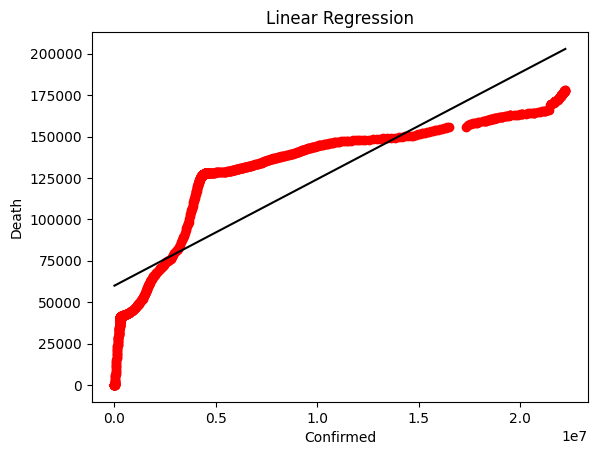

In [23]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Death")
plt.xlabel("Confirmed")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [ ]:
y = lambda x : 5.98183668e+04*x + 6.44677581e-03

In [61]:
y(1)

28749.161594504763

##### Polynomial regression

In [24]:
lg = LinearRegression()
poly = PolynomialFeatures(degree = 3)

In [26]:
x_train_fit = poly.fit_transform(x_train) #transforming our input data

In [56]:
x_train_fit

array([[1.00000000e+00, 2.20383400e+07, 4.85688430e+14, 1.07037668e+22],
       [1.00000000e+00, 3.20286000e+05, 1.02583122e+11, 3.28559377e+16],
       [1.00000000e+00, 4.10567500e+06, 1.68565672e+13, 6.92075866e+19],
       ...,
       [1.00000000e+00, 3.32752000e+05, 1.10723894e+11, 3.68435970e+16],
       [1.00000000e+00, 1.17144100e+06, 1.37227402e+12, 1.60753805e+18],
       [1.00000000e+00, 2.85416000e+05, 8.14622931e+10, 2.32506418e+16]])

In [ ]:
lg.fit(x_train_fit, y_train)

In [28]:
x_test_ = poly.fit_transform(x_test)

In [ ]:
x_test_

In [29]:
predicted = lg.predict(x_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  204464205.2807133
R squared:  0.9263784066169471


In [30]:
lg.coef_

array([ 0.00000000e+00,  2.99910488e-02, -2.26887885e-09,  5.20417043e-17])

In [31]:
lg.intercept_

28749.131603458256

In [78]:
y = lambda x : lg.coef_[3]*x**3 + lg.coef_[2]*x**2 +lg.coef_[1]*x + lg.coef_[0] * lg.intercept_

In [79]:
print(round(y(10000000)))

125064


In [35]:
#dump(lg.coef_, "y.joblib")

['y.joblib']

In [36]:
#dump(lg.intercept_, "y2.joblib")

['y2.joblib']

According to the results, polynomial regression is better than linear regression with a R squared value of 0.91 (the fit of the regression is almost perfect).

##### Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
scores= cross_val_score(lg, x_train_fit, y_train, cv=5)

In [40]:
print("Accuracy on each fold/subset :", scores)
print("The average accuracy is :", sum(scores)/5)

Accuracy on each fold/subset : [0.93025013 0.85402733 0.96135513 0.88864512 0.9582122 ]
The average accuracy is : 0.9184979837746617


##### Grid Search

In [41]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [42]:
from sklearn.metrics import get_scorer_names

scoring_options = get_scorer_names()
print(scoring_options)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [43]:
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))


In [44]:
param_grid = {'polynomialfeatures__degree': np.arange(10), 'linearregression__fit_intercept': [True, False]}
s = GridSearchCV(PolynomialRegression() , param_grid, scoring='r2', cv=10, verbose=3 )


In [ ]:
s.fit(x_train,y_train)

In [46]:
print("Best cross-validation score: {:.2f}".format(s.best_score_))

Best cross-validation score: 0.94


In [47]:
print(s.best_params_) #best_params is used to extract the best polynomial degree

{'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 3}


#### Save the model

In [48]:
from joblib import dump, load

In [49]:
dump(lg, 'covid19.joblib')

['covid19.joblib']

In [50]:
df.describe()

,latestBy,confirmed,deathNew,death
count,806.000000,8.060000e+02,806.000000,806.000000
mean,26698.198511,6.331293e+06,216.017370,100634.790323
std,34593.025784,6.741217e+06,292.555338,52127.122593
min,0.000000,1.600000e+02,0.000000,1.000000
25%,2679.500000,4.113875e+05,26.000000,41872.000000
50%,15594.500000,4.374578e+06,120.000000,127111.500000
75%,37996.750000,9.048212e+06,271.500000,140613.500000
max,226524.000000,2.223871e+07,1820.000000,177977.000000
